.ipynb settings

In [2]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

In [3]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions

Importation of the dataset(s) and pipeline(s)

In [14]:
#Importing dataset(s)
from data import make_dataset
from pipeline import model


#Load the big datase
feat_engineered_ds = make_dataset.load_data(True, 'interim/feat_engineered_ds')

#Load the train and test datasets:
X_train_00   = make_dataset.load_data(False, 'processed/split/X_train_00')
Y_train_00   = make_dataset.load_data(False, 'processed/split/Y_train_00')
X_test_00   = make_dataset.load_data(False, 'processed/split/X_test_00')
X_test_info_00 = make_dataset.load_data(False, 'processed/split/X_test_info')
Y_test_00   = make_dataset.load_data(False, 'processed/split/Y_test_00')



#Load the not_split train and test datasets:
X   = make_dataset.load_data(False, 'processed/not_split/X')
Y   = make_dataset.load_data(False, 'processed/not_split/Y')
X_info = make_dataset.load_data(False, 'processed/not_split/X_info')



#Load the train lists names
H_A_col_to_concat = make_dataset.load_string_list("H_A_col_to_concat")
names_col_concatenated = make_dataset.load_string_list("names_col_concatenated")
contextual_col = make_dataset.load_string_list("contextual_col")
col_to_remove = make_dataset.load_string_list("col_to_remove")



#Import the trained pipeline
under_testing_pipeline_trained = model.load_pipeline("under_testing_pipeline_trained")
under_testing_pipeline = model.load_pipeline("under_testing_pipeline")


The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


Successfully loaded the list: H_A_col_to_concat
Successfully loaded the list: names_col_concatenated
Successfully loaded the list: contextual_col
Successfully loaded the list: col_to_remove
Successfully loaded the pipeline: under_testing_pipeline_trained


Successfully loaded the pipeline: under_testing_pipeline




# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\notebooks\../src\pipeline\results.py:496: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_info_pred = pd.concat([X_info_pred, X_test_info_for_this_seas], ignore_index=True, axis=0)


Successfully loaded the datasets: best_pipeline_results


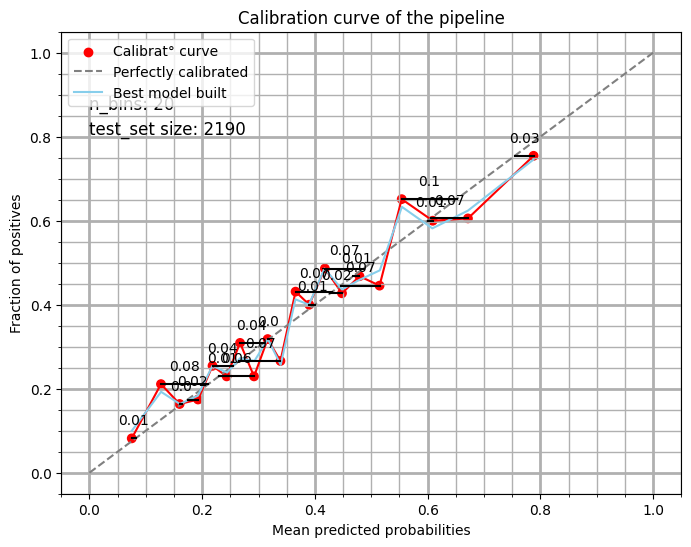

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.11]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.11, 0.14]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.14, 0.18]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.18, 0.21]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.21, 0.23]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.23, 0.25]   │                         109 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.25, 0.28]   │                         110 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.28, 0.3]    │                 

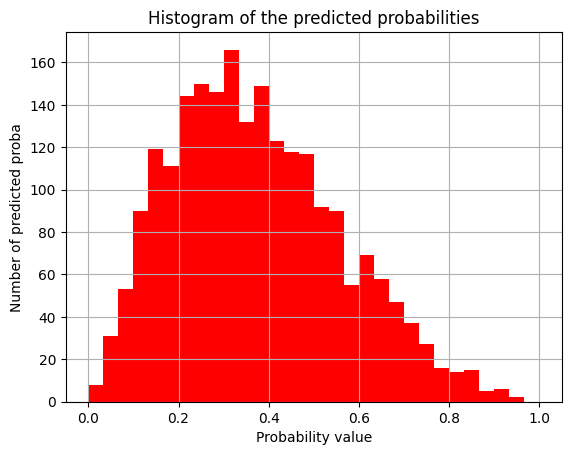

In [15]:
#src.pipeline.results
from pipeline import results
from sklearn.base import clone
from dvclive import Live
from sklearn.metrics import accuracy_score



test_seasons = [2021,2022,2023,2024]

#Make proba predictions retraining the pipeline at every Game Week or every Season:
proba_pred_GW_training, Y_test_00_GW_training, X_info_GW_training = results.proba_prediction_retrained_each_seas(X, Y, X_info, clone(under_testing_pipeline), 'season', test_seasons)



#Make 'normal' proba predictions on the test_seasons (defined in V)1) )
normal_proba_pred = under_testing_pipeline_trained.predict_proba(X_test_00)[:,1]



# We choose wether we plot the graphs on GW training simulations or on 'normal' training simulations
Y_test_01 = Y_test_00_GW_training
X_test_info_01 = X_info_GW_training

proba_pred = proba_pred_GW_training



#Plot Calibration curve of the pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(
                                Y_test_0 = Y_test_01.copy(),
                                X_train_0 = X_test_info_01.copy(),
                                proba_pred_0 = proba_pred.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                GW_training_or_not = True,
                                best_model_plot = True)

#We display statistics on the pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(proba_pred.copy(), 30, 'r', 'predicted probabilities')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_00.copy(), Y_train_00.copy(), X_test_00.copy(), Y_test_00.copy(), under_testing_pipeline_trained)


<span style="color:#FF1493;"> <strong> <font size="4">3) Probabilities calibration and distribution study depending on different parameters

Calibration curve of proba predicted on matches where Played_matches_nb C [ 6 , 21 ]


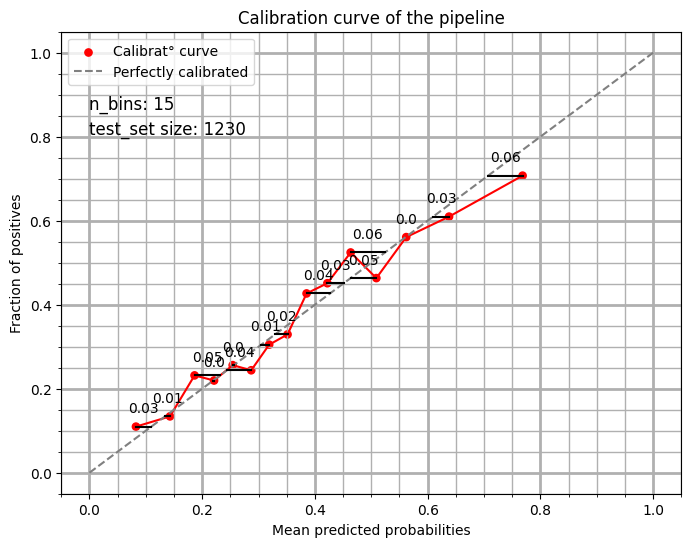

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.12]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.16]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.21]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.21, 0.24]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.24, 0.27]   │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.34]    │                          82 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.34, 0.37]   │                 

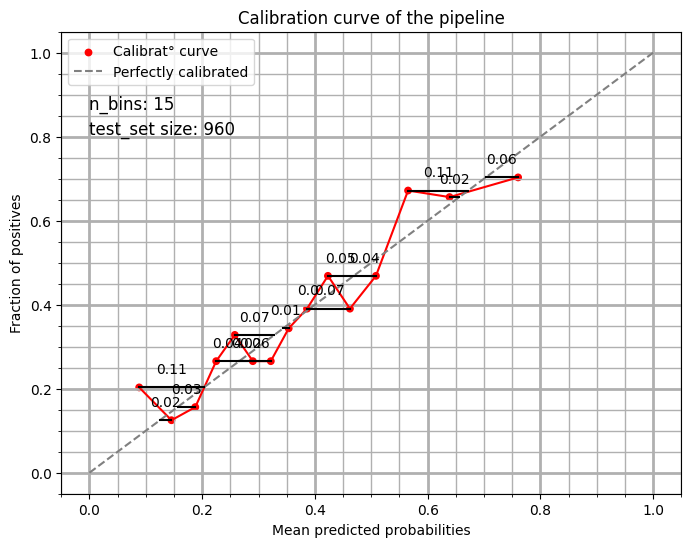

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.03, 0.12]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.17]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.17, 0.21]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.21, 0.24]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.24, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.31]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.31, 0.34]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.34, 0.37]   │                 

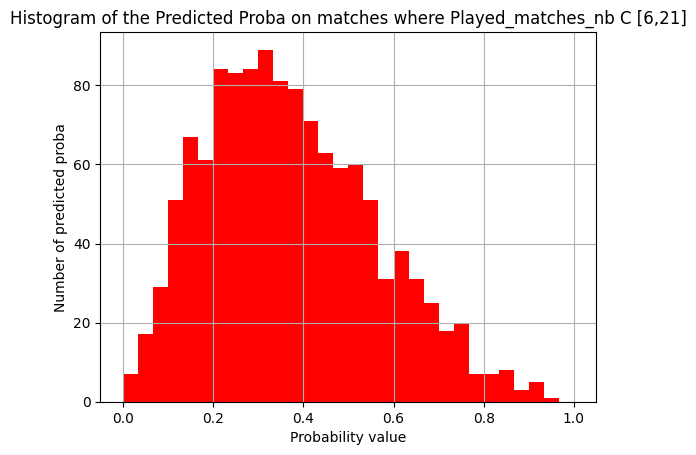

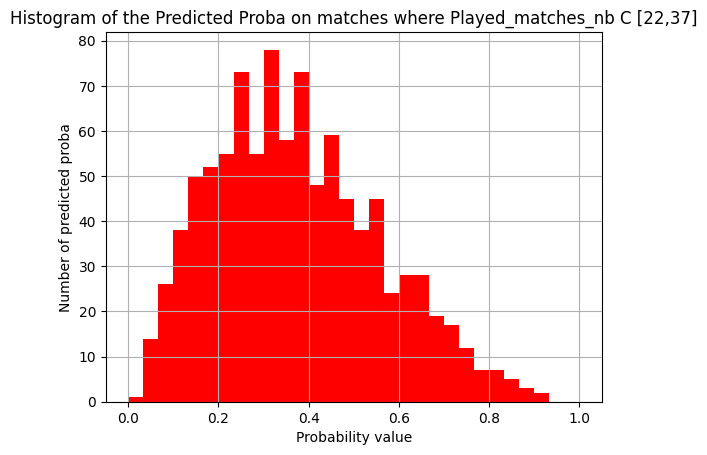

In [13]:
#src.pipeline.analysis

from pipeline import analysis
# We divide the dataframe in n subdataframes classified following the nb of played matches
subdatasets = analysis.calibration_over_season_advancement(2, X_info_GW_training, proba_pred_GW_training, Y_test_00_GW_training)

#Plot Calibration curves for each of these dataframes
results.calibration_curves_subdataframes(subdatasets, 15, 30, True)



<span style="color:#FF1493;"> <strong> <font size="4">4) Model coefficients study

In [16]:
#src.pipeline.results
results.features_coeff_report(under_testing_pipeline_trained, X_train_00)

[[ 0.09593197  0.15095558 -0.122651    0.03811209  0.22500461  0.04095627
   0.15095558  0.05455909  0.04212771  0.04223827 -0.05174704  0.17970293
   0.02619475  0.42960244]]
╒═════════════════════════════════════════════════╤═══════════════╕
│ Feature                                         │   Coefficient │
╞═════════════════════════════════════════════════╪═══════════════╡
│ Diff_Avg_points_pm_ponderated_by_adversary_perf │     0.095932  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_goal_diff                              │     0.150956  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_scored_g_conceeded_g_ratio             │    -0.122651  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_collected_points                       │     0.0381121 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Annual_budget                              │     0.225005  │
├───────

# VIII) <u> Learning curves

<span style="color:#FF1493;"> <strong> <font size="4">1) Pipeline learning curve

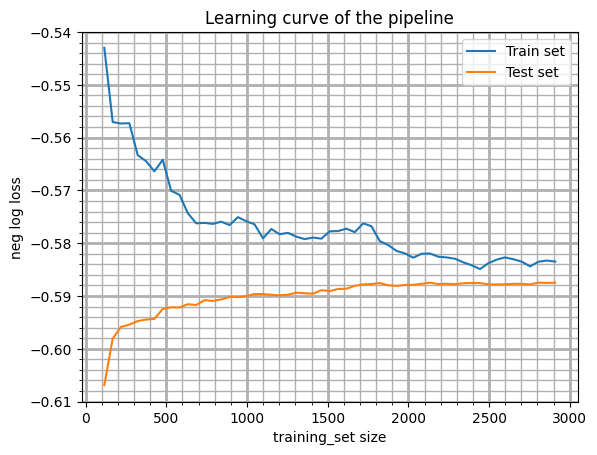

In [17]:
#src.visualization.learning_curves

from visualization import learning_curves

# Plot learning curves for our pipeline
learning_curves.pipeline_learning_curve(X_train_00.copy(),
                                        Y_train_00.copy(),
                                        under_testing_pipeline,
                                        'neg_log_loss')

<span style="color:#FF1493;"> <strong> <font size="4">2) Save the pipeline and its results 

In [11]:
# if we judge the pipeline tested performant enough we save it under the status 'chosen' or 'best' if it beats the former best pipeline

# Save the pipeline results
# results.save_pred_proba(proba_pred, Y_test_01, X_test_info_01, "chosen_pipeline_results _n")

# Save the pipeline
# model.save_pipeline(under_testing_pipeline_trained, "chosen_pipeline_trained_n")



No best_pipeline_results existing file to compare; treating as new datasets.
An error occurred while deleting the old file: name 'os' is not defined
Successfully saved the new datasets: best_pipeline_results


No old pipeline to delete at:              best_pipeline_trained
Successfully saved the new pipeline:       best_pipeline_trained


